In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv("../prac6/METABRIC_RNA_Mutation.csv" )

In [6]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha

In [7]:
#process of selecting x consisting of mutated gene expressions

In [8]:
df.dtypes.index

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [12]:
df_mutated_genes=df.loc[:, ["death_from_cancer","mtap_mut", "ppp2cb_mut",'hras_mut', "prps2_mut","nras_mut", "ndfip1_mut","smarcd1_mut", "smarcb1_mut", "stmn2_mut", "siah1_mut"]]

In [13]:
df_mutated_genes.head()


,death_from_cancer,mtap_mut,ppp2cb_mut,hras_mut,prps2_mut,nras_mut,ndfip1_mut,smarcd1_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,Living,0,0,0,0,0,0,0,0,0,0
1,Living,0,0,0,0,0,0,0,0,0,0
2,Died of Disease,0,0,0,0,0,0,0,0,0,0
3,Living,0,0,0,0,0,0,0,0,0,0
4,Died of Disease,0,0,0,0,0,0,0,0,0,0


In [14]:
df_mutated_genes.dtypes

death_from_cancer    object
mtap_mut             object
ppp2cb_mut           object
hras_mut             object
prps2_mut            object
nras_mut             object
ndfip1_mut           object
smarcd1_mut          object
smarcb1_mut          object
stmn2_mut            object
siah1_mut            object
dtype: object

In [15]:
df_mutated_genes.isna().sum()

death_from_cancer    1
mtap_mut             0
ppp2cb_mut           0
hras_mut             0
prps2_mut            0
nras_mut             0
ndfip1_mut           0
smarcd1_mut          0
smarcb1_mut          0
stmn2_mut            0
siah1_mut            0
dtype: int64

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
x=df_mutated_genes.drop("death_from_cancer", axis=1)

In [19]:
x=pd.get_dummies (columns=x. columns, data=x,dtype=int, drop_first=True)

In [20]:
x.dtypes


mtap_mut_A213S_1           int64
mtap_mut_A247S_1           int64
mtap_mut_I138M_1           int64
mtap_mut_I255L_1           int64
ppp2cb_mut_G128V_1         int64
ppp2cb_mut_I224S_1         int64
ppp2cb_mut_R110C_1         int64
ppp2cb_mut_R254Q_1         int64
hras_mut_0_1               int64
hras_mut_N86T_1            int64
hras_mut_Q61R_1            int64
prps2_mut_G255R_1          int64
prps2_mut_I159F_1          int64
nras_mut_D108N_1           int64
nras_mut_G12S_1            int64
nras_mut_T124A_1           int64
ndfip1_mut_A50T_1          int64
ndfip1_mut_N68S_1          int64
ndfip1_mut_X51_splice_1    int64
smarcd1_mut_L434M_1        int64
smarcd1_mut_M366T_1        int64
smarcd1_mut_N84S_1         int64
smarcd1_mut_P78R_1         int64
smarcb1_mut_0_1            int64
smarcb1_mut_D159N_1        int64
smarcb1_mut_I28L_1         int64
stmn2_mut_N145K_1          int64
stmn2_mut_R156H_1          int64
siah1_mut_0_1              int64
siah1_mut_T249A_1          int64
dtype: obj

In [22]:
#remove duplicate columns
x = x.loc[:,~x.columns.duplicated() ].copy()

In [23]:
x.dtypes

mtap_mut_A213S_1           int64
mtap_mut_A247S_1           int64
mtap_mut_I138M_1           int64
mtap_mut_I255L_1           int64
ppp2cb_mut_G128V_1         int64
ppp2cb_mut_I224S_1         int64
ppp2cb_mut_R110C_1         int64
ppp2cb_mut_R254Q_1         int64
hras_mut_0_1               int64
hras_mut_N86T_1            int64
hras_mut_Q61R_1            int64
prps2_mut_G255R_1          int64
prps2_mut_I159F_1          int64
nras_mut_D108N_1           int64
nras_mut_G12S_1            int64
nras_mut_T124A_1           int64
ndfip1_mut_A50T_1          int64
ndfip1_mut_N68S_1          int64
ndfip1_mut_X51_splice_1    int64
smarcd1_mut_L434M_1        int64
smarcd1_mut_M366T_1        int64
smarcd1_mut_N84S_1         int64
smarcd1_mut_P78R_1         int64
smarcb1_mut_0_1            int64
smarcb1_mut_D159N_1        int64
smarcb1_mut_I28L_1         int64
stmn2_mut_N145K_1          int64
stmn2_mut_R156H_1          int64
siah1_mut_0_1              int64
siah1_mut_T249A_1          int64
dtype: obj

In [28]:
#replace null values with "Living"
df["death_from_cancer"].fillna("Living", inplace=True)

In [29]:
df["death_from_cancer"].value_counts()

death_from_cancer
Living                  802
Died of Disease         622
Died of Other Causes    480
Name: count, dtype: int64

In [30]:
y=df["death_from_cancer" ]

In [31]:
best_model=SelectKBest(f_classif,k=4).fit(x,y)

In [32]:
col_bst=best_model.get_support(indices=True)

In [33]:
col_bst

array([ 8, 23, 26, 28])

In [34]:
x.iloc[:, col_bst].head()

,hras_mut_0_1,smarcb1_mut_0_1,stmn2_mut_N145K_1,siah1_mut_0_1
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [40]:
x_new_best=SelectKBest(f_classif, k=4).fit_transform(x,y)

In [41]:
x_new_best.shape

(1904, 4)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [46]:
x_scaled=StandardScaler().fit_transform(x_new_best)

In [45]:
x_scaled

array([[-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       ...,
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ]])

In [49]:
wcss=[]
for i in range(2,6):
    model = KMeans(init="random", n_clusters=1, random_state=100).fit(x_scaled)
    wcss.append(model.inertia_)

In [50]:
wcss

[7615.9999999999845,
 7615.9999999999845,
 7615.9999999999845,
 7615.9999999999845]

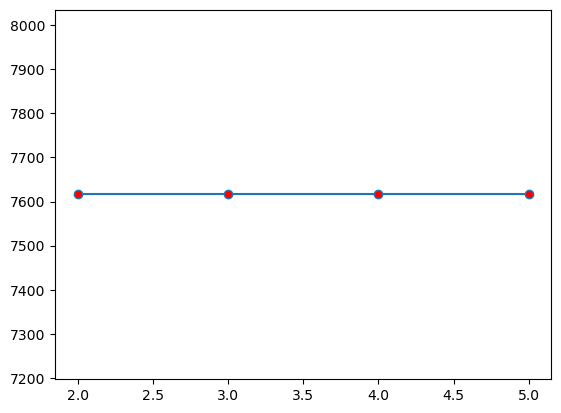

In [52]:
plt.plot(range(2,6),wcss,marker="o",markerfacecolor="red")

In [53]:
kmeans_final=KMeans(n_clusters=2, init="random").fit(x_scaled)

In [54]:
clusters=kmeans_final.predict(x_scaled)

In [55]:
clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [56]:
x["clusters"]=clusters
print(x["clusters"].value_counts())

clusters
1    1024
0     880
Name: count, dtype: int64


In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(x_new_best, clusters)

0.996067024279685

In [67]:
x_new=x.iloc[:,col_bst]

In [68]:
x_new["death_from_cancer"]=y

In [69]:
x_new["clusters"]=clusters

<Axes: xlabel='clusters', ylabel='count'>

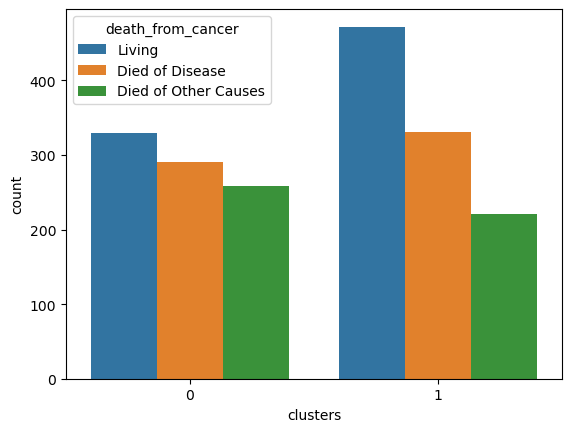

In [70]:
sns.countplot(x="clusters", hue="death_from_cancer", data=x_new)

In [72]:
x_new[x_new.clusters==0].head()

,hras_mut_0_1,smarcb1_mut_0_1,stmn2_mut_N145K_1,siah1_mut_0_1,death_from_cancer,clusters
1024,1,1,0,1,Living,0
1025,1,1,0,1,Died of Disease,0
1026,1,1,0,1,Living,0
1027,1,1,0,1,Died of Disease,0
1028,1,1,0,1,Living,0


In [73]:
x_new["stmn2_mut_N145K_1"].value_counts()

stmn2_mut_N145K_1
0    1903
1       1
Name: count, dtype: int64

In [71]:
x_new[x_new.clusters==1].head()

,hras_mut_0_1,smarcb1_mut_0_1,stmn2_mut_N145K_1,siah1_mut_0_1,death_from_cancer,clusters
0,0,0,0,0,Living,1
1,0,0,0,0,Living,1
2,0,0,0,0,Died of Disease,1
3,0,0,0,0,Living,1
4,0,0,0,0,Died of Disease,1
